In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [122]:
d = np.load('data1.npz')
lat = d['lat'];lon = d['lon'];u=d['u']

In [284]:
def plot_field(lat,lon,u,time,levels=20):
    """
    Generate contour plot of u at particular time
    Use if/as needed
    Input:
    lat,lon: latitude and longitude arrays
    u: full array of wind speed data
    time: time at which wind speed will be plotted (index between 0 and 364)
    levels: number of contour levels in plot
    """
    plt.figure()
    plt.contourf(lon,lat,u[time,:,:],levels)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.show()
    
    return None

def part1():#add input if needed
    """
    Code for part 1
    """ 

    #--- load data ---#
    d = np.load('data1.npz')
    lat = d['lat'];lon = d['lon'];u=d['u']
    #-------------------------------------#


    plot_field(lat, lon, u, 0)
    plot_field(lat, lon, u, 1)
    plot_field(lat, lon, u, 2)

    X = u.reshape((u.shape[0], u.shape[1] * u.shape[2]))
    M, N = X.shape
    A_spatial= np.transpose(X-X.mean(axis=0))
    A_temporal = np.transpose(X.T-X.mean(axis=1))
    U_spatial, _, _ = np.linalg.svd(A_spatial)
    U_temporal, _, _ = np.linalg.svd(A_temporal)

    Cov = 1/(N-1)*A_spatial.dot(A_spatial.T)
    total_variance = np.sum(np.diag(Cov))
    evals, evects = np.linalg.eig(Cov)
    plt.plot((np.cumsum(np.abs(evals))/total_variance)[:100], label='Spatial Principal Components', color='blue')
    Covq = 1/(M-1)*A_temporal.dot(A_temporal.T)
    total_variance = np.sum(np.diag(Covq))
    evals, evects = np.linalg.eig(Covq)
    plt.plot((np.cumsum(np.abs(evals))/total_variance)[:100], label='Temporal Principal Components', color='orange')
    plt.title('Cumulative Variance explained by the first 100 Principal Components')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion Variance')
    plt.legend()
    plt.show()

    for i in range(2):
        plt.plot(U_spatial[:, i], color='blue')
        plt.title(f'{i}th Spatial Principal component')
        plt.xlabel('i')
        plt.ylabel('ith value in PC')
        plt.show()


        plt.contourf(lon, lat, (U_spatial[:, i]).reshape((16,144)))
        plt.title(f'{i}th Spatial Principal component, reshaped')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

        plt.plot(A_spatial.T @ U_spatial[:, i], color='blue')
        plt.xlabel('time')
        plt.ylabel('x̃(t)')
        plt.title(f'$x̃_{i}$')
        plt.show()

        x = np.fft.fftshift(np.fft.fft(A_spatial.T @ U_spatial[:, i] - np.mean(A_spatial.T @ U_spatial[:, i])))
        plt.plot(np.fft.fftshift(np.fft.fftfreq(x.shape[0])), np.abs(x), color='blue')
        plt.axvline(2/365, color='r', linestyle='--', label=f'{np.fft.fftshift(np.fft.fftfreq(x.shape[0]))[np.argmax(x)]}')
        plt.xlabel('f')
        plt.ylabel('S(f)')
        plt.title(f'FFT of $x̃_{i}$')
        plt.legend()
        plt.show()
        print(f'The dominant frequency is at {np.fft.fftshift(np.fft.fftfreq(x.shape[0]))[np.argmax(x)]}')

        plt.plot(U_temporal[:, i], color='blue')
        plt.title(f'{i}th Temporal Principal component')
        plt.xlabel('time')
        plt.ylabel('PC value')
        plt.show()

        x = np.fft.fftshift(np.fft.fft(U_temporal[:, i] - np.mean(U_temporal[:, i])))
        plt.plot(np.fft.fftshift(np.fft.fftfreq(x.shape[0])), np.abs(x), color='blue')
        plt.axvline(2/365, color='r', linestyle='--', label=f'{2/365}')
        plt.xlabel('f')
        plt.ylabel('S(f)')
        plt.title(f'FFT of temporal Principal Component {i}')
        plt.legend()
        plt.show()
        print(f'The dominant frequency is at {np.fft.fftshift(np.fft.fftfreq(x.shape[0]))[np.argmax(x)]}')

    return None #modify if needed

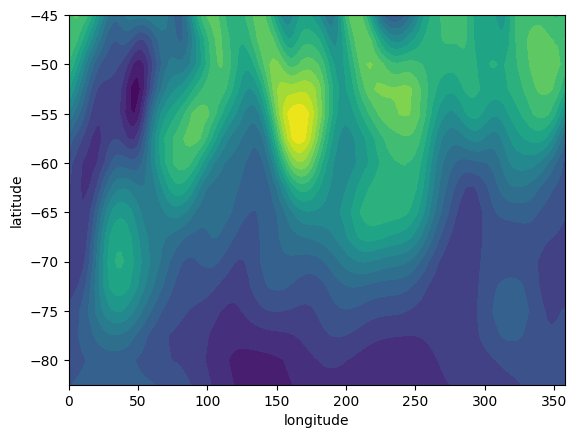

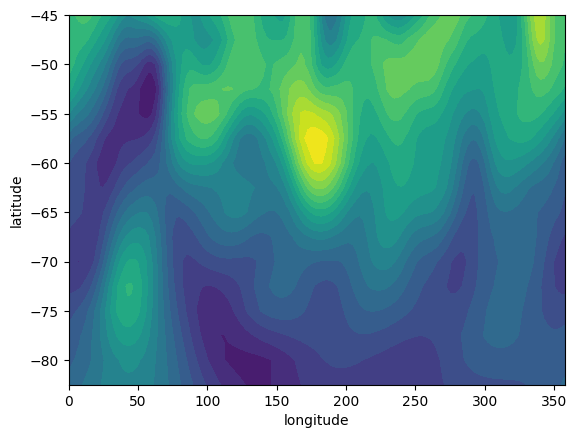

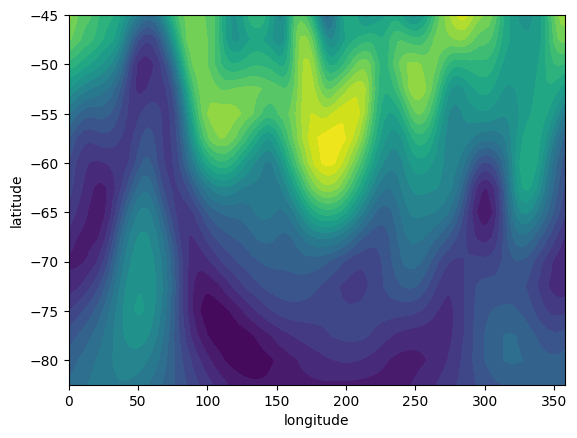

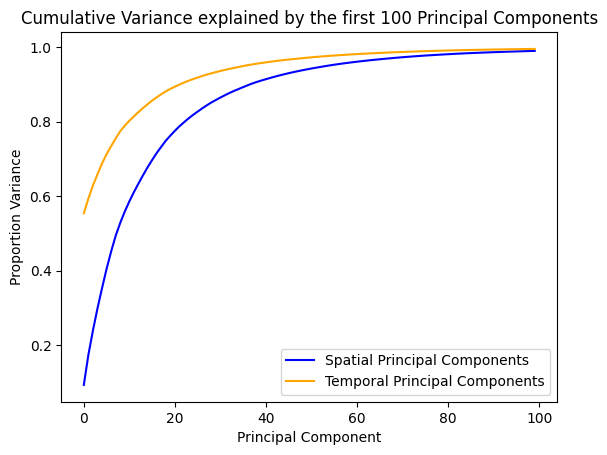

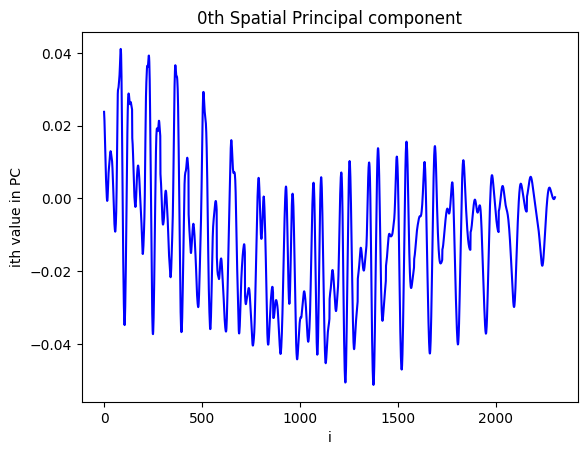

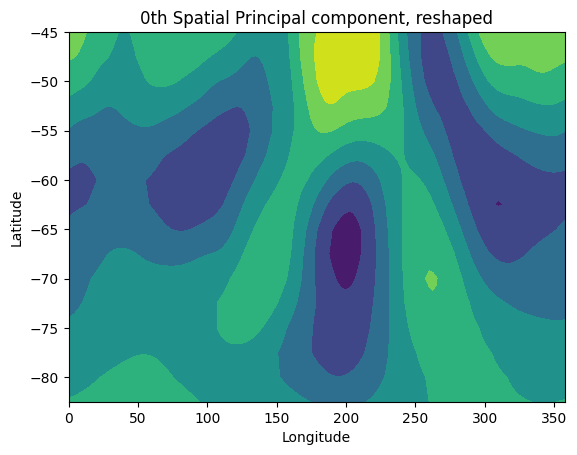

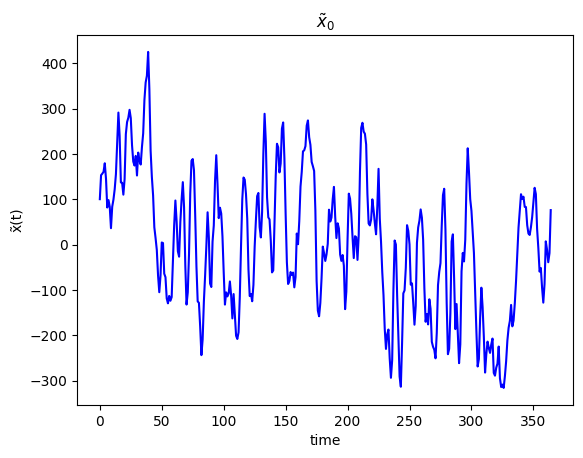

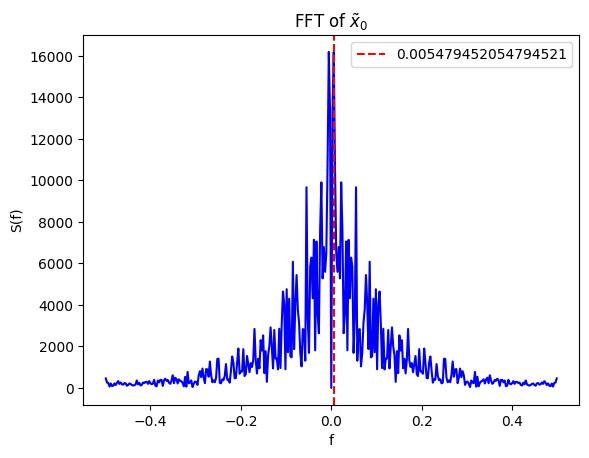

The dominant frequency is at 0.005479452054794521


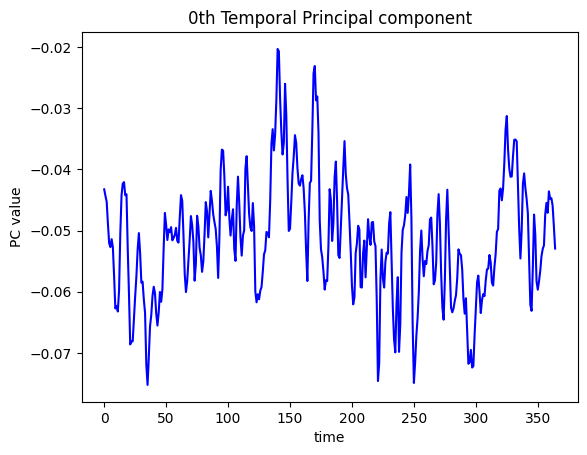

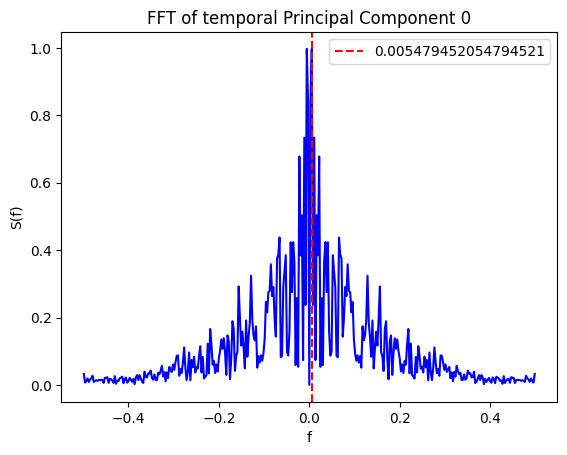

The dominant frequency is at 0.005479452054794521


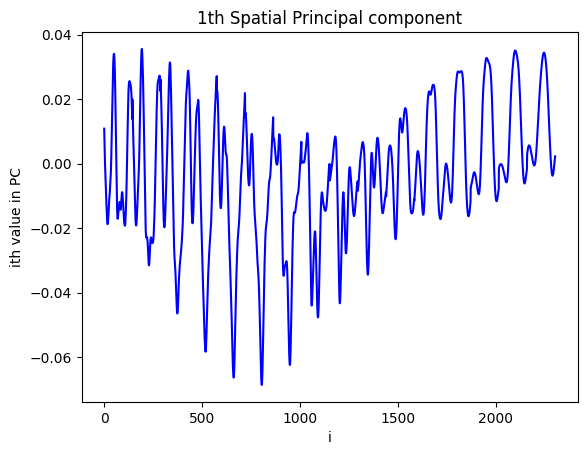

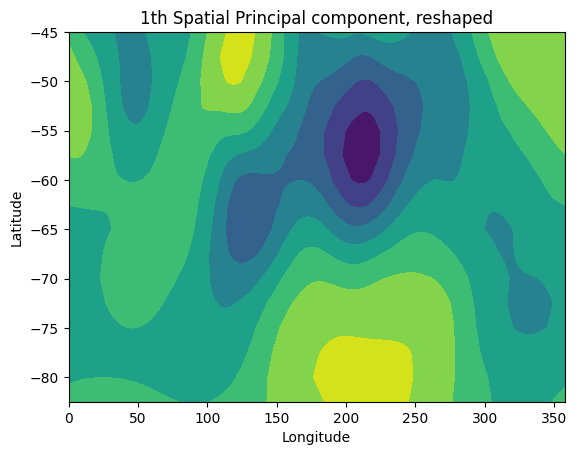

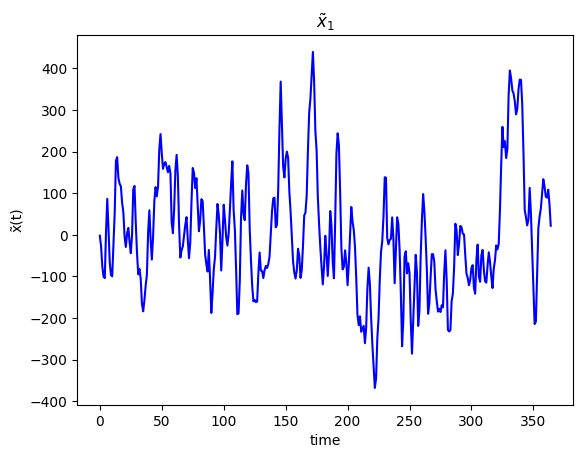

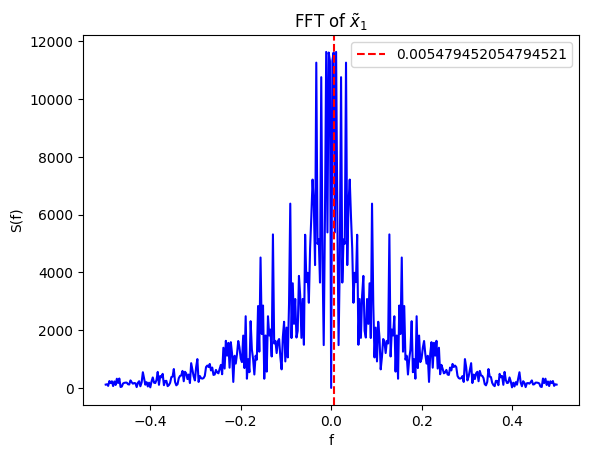

The dominant frequency is at 0.005479452054794521


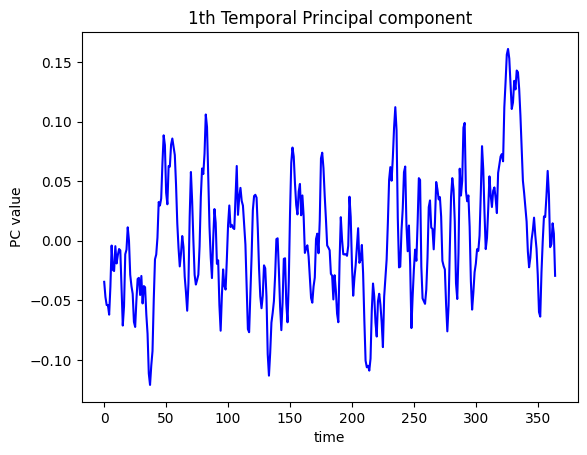

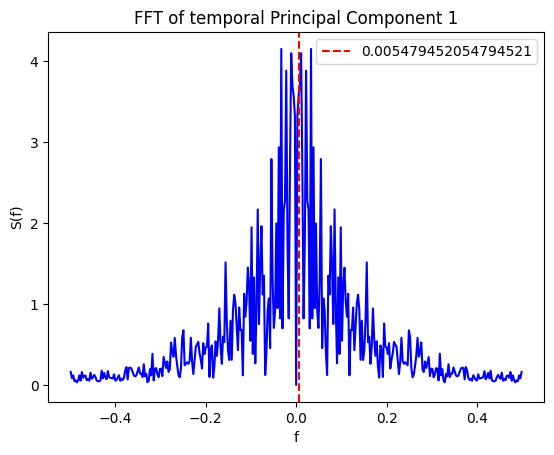

The dominant frequency is at 0.0027397260273972603


In [285]:
part1()

Following Lab 7 Solutions

In [224]:
X = u.reshape((u.shape[0], u.shape[1] * u.shape[2]))
M, N = X.shape
A_spatial= np.transpose(X-X.mean(axis=0))
A_temporal = np.transpose(X.T-X.mean(axis=1))
U_spatial, _, _ = np.linalg.svd(A_spatial)
U_temporal, _, _ = np.linalg.svd(A_temporal)

(2304, 2304) (365, 2304)


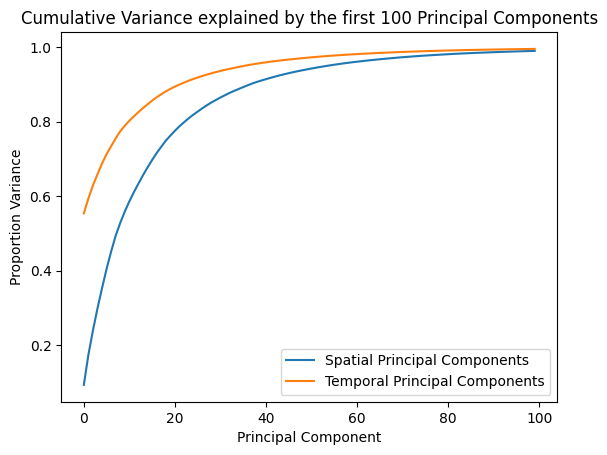

In [231]:
Cov = 1/(N-1)*A_spatial.dot(A_spatial.T)
total_variance = np.sum(np.diag(Cov))
evals, evects = np.linalg.eig(Cov)
plt.plot((np.cumsum(np.abs(evals))/total_variance)[:100], label='Spatial Principal Components')
Covq = 1/(M-1)*A_temporal.dot(A_temporal.T)
total_variance = np.sum(np.diag(Covq))
evals, evects = np.linalg.eig(Covq)
plt.plot((np.cumsum(np.abs(evals))/total_variance)[:100], label='Temporal Principal Components')
plt.title('Cumulative Variance explained by the first 100 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Proportion Variance')
plt.legend()
plt.show()

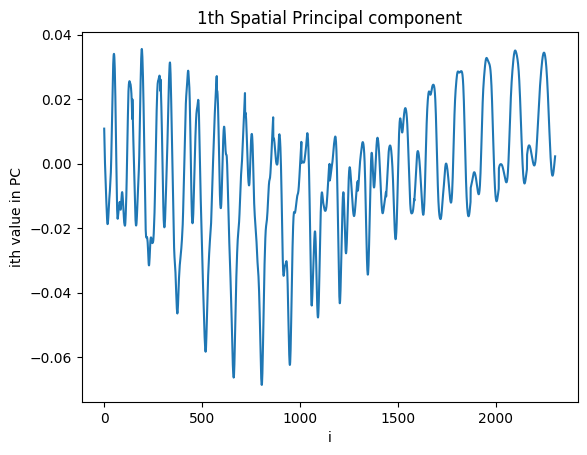

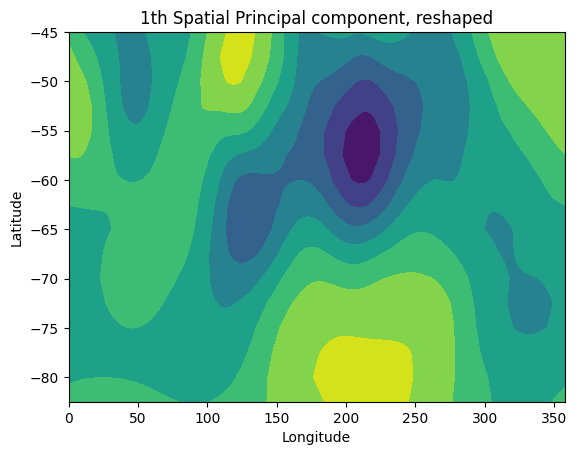

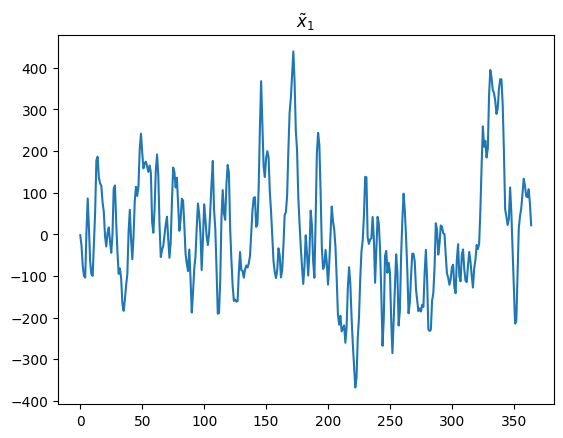

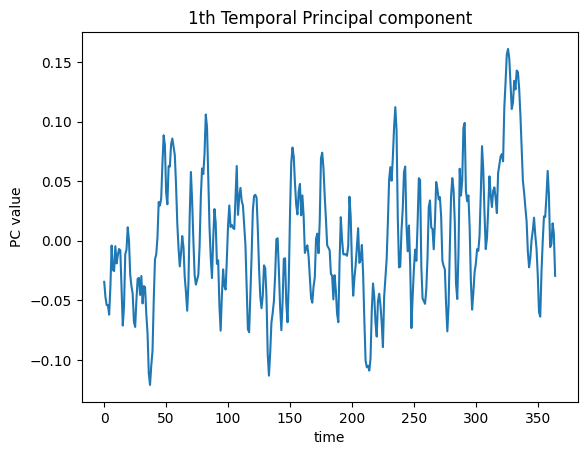

In [262]:
i=1

x_tild = 'x&#771;'
plt.plot(U_spatial[:, i])
plt.title(f'{i}th Spatial Principal component')
plt.xlabel('i')
plt.ylabel('ith value in PC')
plt.show()


plt.contourf(lon, lat, (U_spatial[:, i]).reshape((16,144)))
plt.title(f'{i}th Spatial Principal component, reshaped')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.plot(A_spatial.T @ U_spatial[:, i])
plt.title(f'$x̃_{i}$')
plt.show()

plt.plot(U_temporal[:, i])
plt.title(f'{i}th Temporal Principal component')
plt.xlabel('time')
plt.ylabel('PC value')
plt.show()

# repeat for a couple. find the frequency of the temporal one bc thats the one that changes

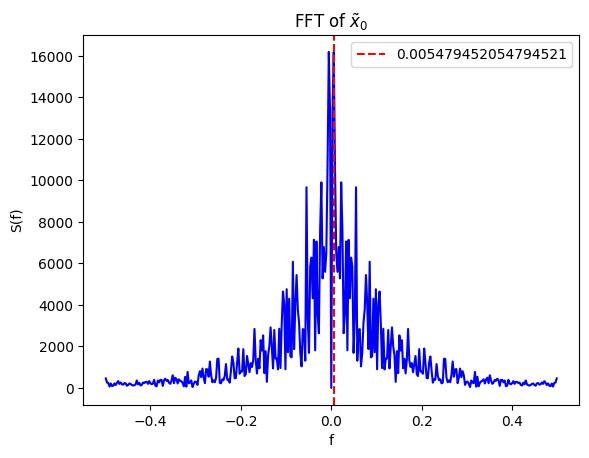

The dominant frequency is at 0.005479452054794521


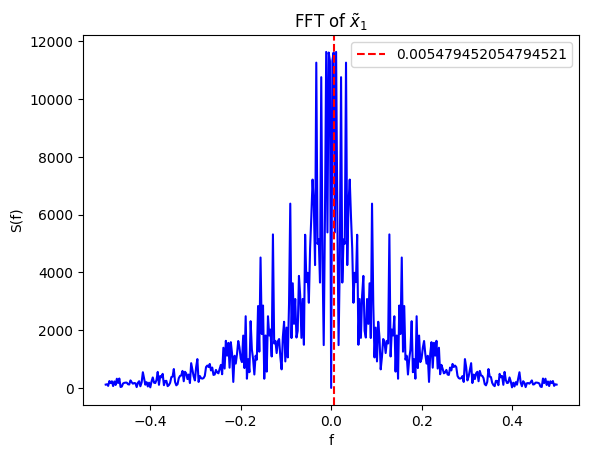

The dominant frequency is at 0.005479452054794521


In [279]:
for i in range(2):
    

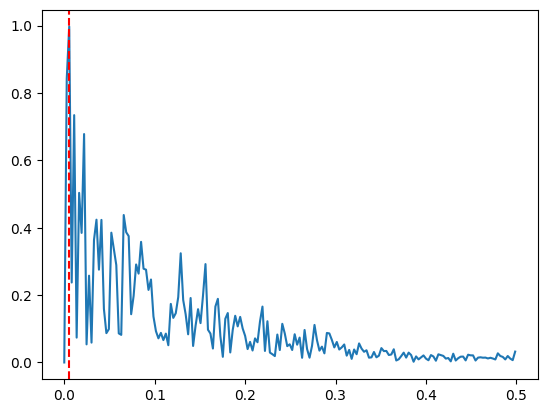

0.005479452054794521


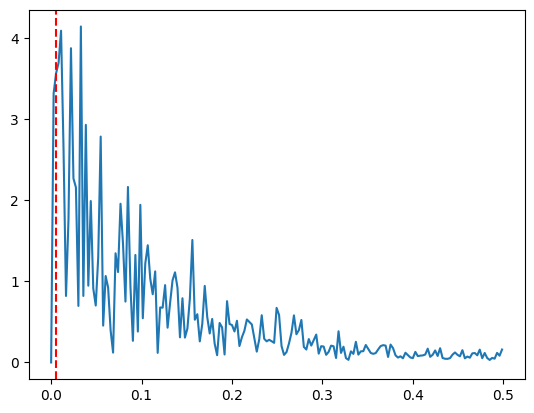

0.0027397260273972603


In [273]:
for i in range(2):
    x = np.fft.fftshift(np.fft.fft(U_temporal[:, i] - np.mean(U_temporal[:, i])))
    plt.plot(np.fft.fftshift(np.fft.fftfreq(x.shape[0]))[x.shape[0]//2:], np.abs(x)[x.shape[0]//2:])
    plt.axvline(1/182.5, color='r', linestyle='--')
    # plt.axvline(1/52, color='g', linestyle='--')
    # plt.axvline(1/12, color='orange', linestyle='--')
    plt.show()
    print(np.fft.fftshift(np.fft.fftfreq(x.shape[0]))[np.argmax(x)])

indication of periodicity at every other day day, each week and each month with small peaks